In [6]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [7]:
to_load=os.listdir(os.path.join(os.getcwd(), "Datascrapes"))

li = []
for csv in to_load: 
    df=pd.read_csv(os.path.join(os.getcwd(), "Datascrapes", csv), parse_dates=['timestamp'], index_col = [0])
    li.append(df)

df=pd.concat(li)
df

,Id,Charger_type,Available,Total,timestamp
0,11514,CCS DC 150kW (ultra),3.0,4.0,2022-03-30 13:40:11
1,12320,CCS DC 150kW (ultra),0.0,4.0,2022-03-30 13:40:16
2,12949,CCS DC 150kW (ultra),3.0,16.0,2022-03-30 13:40:22
3,12950,CCS DC 150kW (ultra),6.0,8.0,2022-03-30 13:40:12
4,10000034,CCS DC 175kW (ultra),0.0,2.0,2022-03-30 13:40:17
...,...,...,...,...,...
35,10000086,CHAdeMO DC 175kW (ultra),4.0,4.0,2022-05-03 09:40:21
36,10000086,CCS DC 175kW (ultra),4.0,4.0,2022-05-03 09:40:21
37,10000086,CHAdeMO DC 175kW (ultra),4.0,4.0,2022-05-03 09:40:21
38,10000257,CCS DC 175kW (ultra),0.0,1.0,2022-05-03 09:40:28


C:\Users\glh287\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


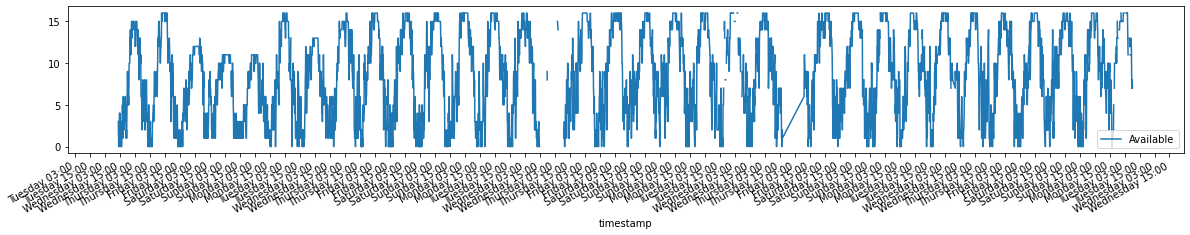

In [8]:
hours = mdates.HourLocator(interval = 12)
h_fmt = mdates.DateFormatter('%A %H:%M')


df_sub = df[df.Id == 12949]
df_sub.timestamp=df_sub.timestamp.dt.round('10min')

ax=df_sub.plot(x='timestamp', y='Available', figsize=(20,3),x_compat = True)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

plt.show()

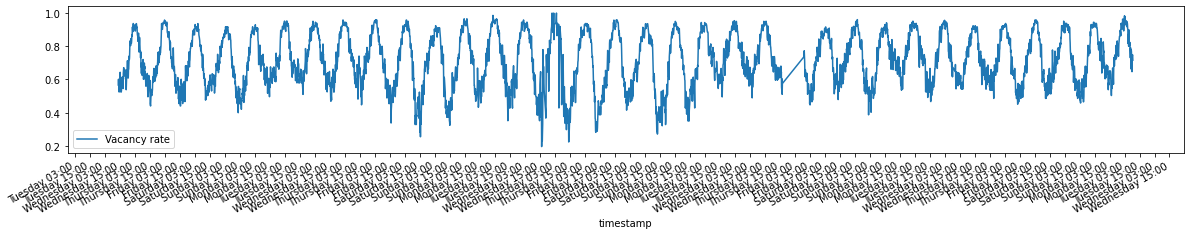

In [9]:

df_sub = df.copy()
df_sub.timestamp=df_sub.timestamp.dt.round('10min')
df_sub = df_sub.groupby('timestamp', as_index = False).sum()
df_sub['Vacancy rate'] = df_sub.Available / df_sub.Total


ax=df_sub.plot(x='timestamp', y='Vacancy rate', figsize=(20,3),x_compat = True)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

plt.show()